# Introduction
In this analysis, we aim to examine the co-dependence between different segments of the financial market during the COVID-19 crisis and compare it to some of the biggest stock market financial crises in history. Our objective is to gain insights into how various financial markets have reacted during these challenging times and assess the relationship between stock index values and oil prices using the GARCH (Generalized Autoregressive Conditional Heteroskedasticity), ARDL (Autoregressive Distributed Lag), and EWMA (Exponentially Weighted Moving Average) models.

The COVID-19 pandemic in 2020 the global economies and financial markets were greatly disrupted, causing significant volatility and uncertainty. By studying the co-dependence between different financial market segments, we can better understand the association between stock indices and oil prices, which are two crucial indicators of economic performance.

To provide a comprehensive analysis, we will compare the Covid crisis with some of the most significant financial crises in history since 1997, including the Dot-Com Bubble Burst in 2000-2002, and the Global Financial Crisis 2008. By drawing parallels and identifying differences, we can gain valuable insights into the unique characteristics and implications of the COVID-19 crisis.

We will utilize the GARCH model, ARDL model, and EWMA method to analyze the relationship between stock index values and oil prices. These analytically tools allow us to capture the volatility, long-term equilibrium, and short-term dynamics between these variables, providing a robust framework for our analysis.

By examining historical data and applying these models, we aim to uncover patterns, assess the impact of the crises on different financial market segments, and provide valuable insights into the co-dependence between stock indices and oil prices. These findings can offer valuable guidance for investors, policymakers, and market participants navigating the current crisis and future challenges.

## Data
Different stock index were collected and merged to form a data frame which  has 8,368 observations and 11 variables. The variables include `Dates` column which represents the dates of the observations.

- Brent_Price: Daily Brent oil prices.
- Cac40_Return: Daily return of CAC40 stock index.
- Dax_Return: Daily return of DAX stock index.
- Dj_Return: Daily return of Dow Jones stock index.
- FTSE_MIB_Return: Daily return of FTSE MIB stock index.
- FTSE_Spain_Return: Daily return of FTSE Spain stock index.
- FTSE100_Return: Daily return of FTSE100 stock index.
- Nasdaq_Return: Daily return of NASDAQ stock index.
- SP500_Return: Daily return of S&P500 stock index.
- Wti_Price: Daily WTI oil prices.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
#! pip install arch
import arch
import numpy as np

In [2]:
# Read the CSV file
Data = pd.read_csv('Return.csv')

# Convert the 'Dates' column to the Date format
Data['Dates'] = pd.to_datetime(Data['Dates'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6968\4278953578.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Data['Dates'] = pd.to_datetime(Data['Dates'])


In [3]:
# Summary
Data.describe().round(3)

,Brent_Price,Cac40_Return,Dax_Return,Dj_Return,FTSE100_Return,FTSE_MIB_Return,FTSE_Spain_Return,Nasdaq_Return,SP500_Return,Wti_Price
count,8034.000,8368.000,8368.000,8368.000,8034.000,8034.000,8034.000,8368.000,8368.000,8034.000
mean,59.901,4468.335,7399.323,14481.479,5895.708,27031.288,413.413,3920.790,1670.304,57.765
std,32.007,1063.585,3324.785,7177.462,987.416,8579.635,124.415,3210.999,885.975,28.465
min,9.100,2403.040,2202.960,6391.690,3287.040,12362.510,194.940,1114.110,676.530,-36.980
25%,30.080,3661.486,4913.900,10073.310,5243.715,20574.748,336.822,1989.160,1122.122,31.760
50%,57.835,4373.770,6382.650,11205.321,5954.180,24290.781,380.350,2515.890,1318.720,56.060
75%,79.388,5268.779,9716.215,16994.445,6588.867,33679.010,461.450,4653.912,1983.679,79.055
max,143.950,7376.371,16271.750,36799.651,7877.446,50108.560,843.460,16057.438,4796.561,145.310


The descriptive analysis indicated that there were no duplicate rows in the data frame, suggesting that each row represents a unique observation.

The first data was collected in January 31, 1997, while the last date data was collected was January 6, 2023. The range of the dates spans approximately 25 years, 11 months and 6 days.

The "Brent_Price" variable represents the price of Brent crude oil. The average value was 61.3 and a standard deviation of 31.5 during the 25 years. The variable had 6348 valid observations and 2020 missing values.

The data includes various stock indices, such as CAC40, DAX, Dow Jones, FTSE MIB, FTSE Spain, FTSE100, NASDAQ, and S&P 500. Each index has its respective return values. The mean, standard deviation, and number of valid observations vary for each index.

The "WTI_Price" variable represents the price of WTI crude oil. The average value was 59 and with a standard deviation of 28 over the 25 years.The variable had 6280 valid observations and 2088 missing values.


# Methods
## Data preperation
To assess the relationship between stock indices and oil prices using the three models, we first prepared the Data by gather historical data for the stock indices (e.g., CAC40, DAX, Dow_Jones, etc.) and oil prices (e.g., Brent_Price, WTI). Next we converted the data to time series format and align the observations based on the corresponding dates.Finally we create a multivariate time series model using VAR.

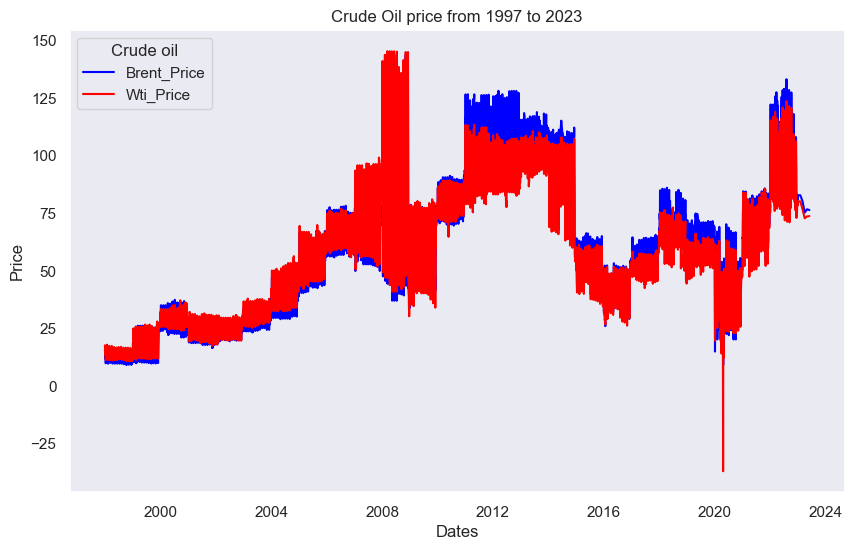

In [4]:
# Set the plot style to dark
sns.set_theme(style="dark")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=Data, x="Dates", y="Brent_Price", color="blue", label="Brent_Price")
sns.lineplot(data=Data, x="Dates", y="Wti_Price", color="red", label="Wti_Price")

# Set the plot title and axis labels
plt.title("Crude Oil price from 1997 to 2023")
plt.ylabel("Price")

# Show the legend
plt.legend(title="Crude oil")

# Display the plot
plt.show()

In [39]:
#Check for stationarity
# Perform ADF test
result = adfuller(Data.iloc[334:,0])

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)

ADF Statistic: 12.017476629350934
p-value: 1.0


In [18]:
###### Calculate the first difference(changing to stationary/calculating return)
Return = Data.iloc[:, 1:] - Data.iloc[:, 1:].shift(1)

# Remove the first row with NaN values
#Return = Return.dropna()

# Converting to time series
Ts = pd.Series(Return.iloc[:, 0:].values.tolist(), index=Data.iloc[:,0])

Return.describe().round(3)

,Brent_Price,Cac40_Return,Dax_Return,Dj_Return,FTSE100_Return,FTSE_MIB_Return,FTSE_Spain_Return,Nasdaq_Return,SP500_Return,Wti_Price
count,8033.000,8367.000,8367.000,8367.000,8033.000,8033.000,8033.000,8367.000,8367.000,8033.000
mean,0.008,0.519,1.383,3.205,0.319,0.097,0.008,1.098,0.372,0.007
std,1.262,54.237,97.141,170.929,58.288,338.329,5.929,73.132,20.996,1.543
min,-16.600,-565.989,-1277.550,-2997.104,-639.043,-3034.198,-60.750,-970.280,-324.888,-55.290
25%,-0.390,-19.253,-30.230,-39.241,-21.700,-115.750,-2.125,-11.760,-4.630,-0.400
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.470,23.837,39.045,55.053,25.190,143.728,2.451,17.910,6.573,0.490
max,10.450,424.867,1016.420,2112.981,452.116,2333.590,67.110,760.972,230.381,45.890


In [38]:
#Check for stationarity
# Perform ADF test
result = adfuller(Return.iloc[335:,0])

# Extract and print the test statistics and p-value
adf_statistic = result[0]
p_value = result[1]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)

ADF Statistic: -14.041350530831924
p-value: 3.2991515590399446e-26


In [28]:
#column bind
Return['Dates']=Data.iloc[:,0]

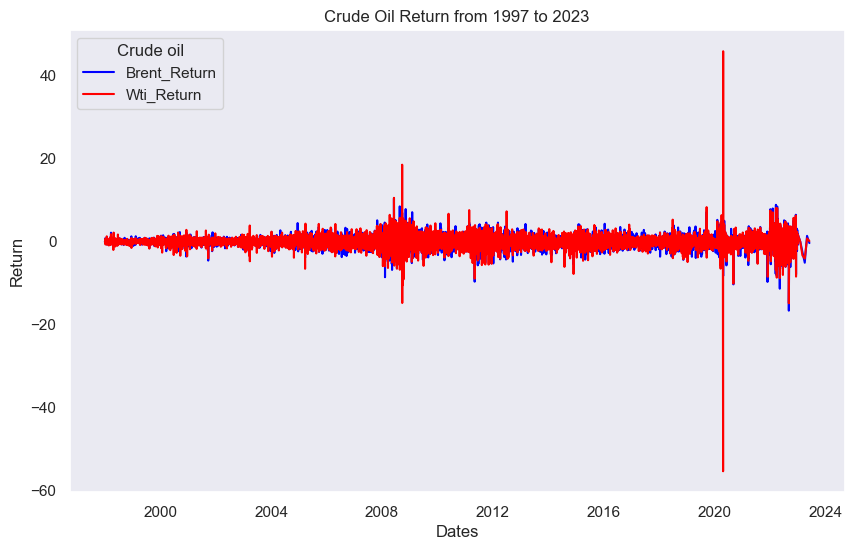

In [29]:
# Set the plot style to dark
sns.set_theme(style="dark")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=Return, x="Dates", y="Brent_Price", color="blue", label="Brent_Return")
sns.lineplot(data=Return, x="Dates", y="Wti_Price", color="red", label="Wti_Return")

# Set the plot title and axis labels
plt.title("Crude Oil Return from 1997 to 2023")
plt.ylabel("Return")

# Show the legend
plt.legend(title="Crude oil")

# Display the plot
plt.show()

## Generalized Autoregressive Conditional Heteroskedasticity (GARCH)
This is a statistical model used to analyze and forecast volatility in financial time series data. It is an extension of the ARCH (Autoregressive Conditional Heteroskedasticity) model and accounts for the conditional variance clustering or volatility clustering observed in financial data.

The GARCH model assumes that the variance of a variable is a function of its past variances and past squared errors. It captures the time-varying nature of volatility by incorporating lagged values of the conditional variance and squared errors into the model. By estimating the parameters of the GARCH model, one can obtain insights into the dynamics of volatility and potentially improve risk management and forecasting in financial analysis.

**Equations and Assumptions in the GARCH Model**
The GARCH(p, q) model can be represented by the following equations:

Mean Equation: $yt = μ + εt$

Variance Equation: $σt^2 = ω + α1εt-1^2 + α2εt-2^2 + ... + αpεt-p^2 + β1σt-1^2 + β2σt-2^2 + ... + βqσt-q^2$

**Assumptions in the GARCH model**

- Stationary: The time series data should be stationary, meaning that the mean and variance of the series remain constant over time or exhibit only predictable changes.

- Serial Independence: The residuals (εt) in the mean equation are assumed to be independently and identically distributed (i.i.d) with a mean of zero and constant variance.

- Conditional Heteroscedasticity: The variance of the residuals is assumed to be time-varying and dependent on past variances (ARCH terms) and past squared errors (GARCH terms).

- Non-negativity of Variance: The variance is always non-negative, ensuring that the GARCH model produces non-negative conditional variances.

It is important to note that the GARCH model assumptions and specifications may vary depending on the specific GARCH variant used, such as GARCH(1,1), GARCH(2,1), etc.

Using the GARCH Model to Assess the Relationship between Stock Indices and Oil Prices

Fit separate GARCH models for each stock index and oil price series using the historical data. This involves specifying the appropriate GARCH model order (e.g., GARCH(1,1), GARCH(2,1), etc.) and estimating the model parameters. The GARCH model parameters can be estimated using methods like maximum likelihood estimation.

- 1: Check volatility clustering
- 2: Check ARCH effect
- 3: Estimate GARCH model

In [30]:
Return=Return.set_index('Dates')

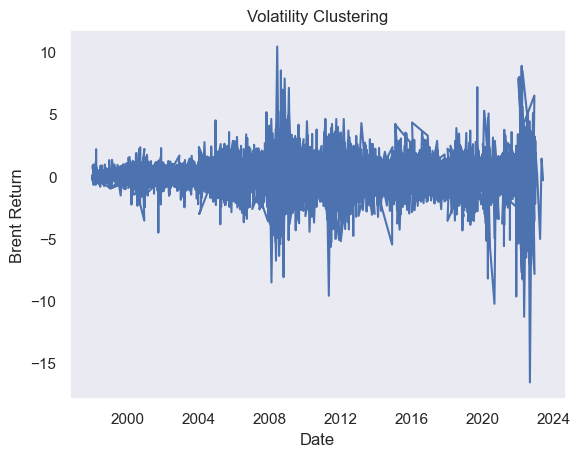

In [31]:
#Checking for volatility clustering
plt.plot(Return.iloc[:,0:1], label='Brent Return')
plt.xlabel('Date')
plt.ylabel('Brent Return')
plt.title('Volatility Clustering')
plt.show()

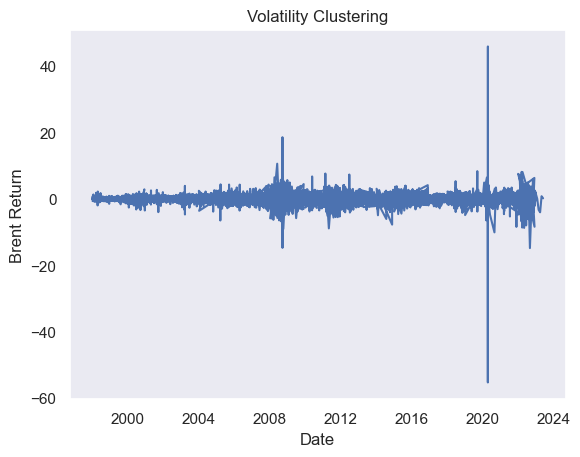

In [32]:
#Checking for volatility clustering
plt.plot(Return.iloc[:,9], label='Wti Return')
plt.xlabel('Date')
plt.ylabel('Brent Return')
plt.title('Volatility Clustering')
plt.show()

In [37]:
# Checking for ARCH effect
# Create the ARCH model
model = arch.arch_model(Return.iloc[335:,0])

# Fit the model
results = model.fit()

# Perform the ARCH LM test
lm_test = results.arch_lm_test(lags=10)  # Specify the number of lags to consider

# Create the ARCH model
model1 = arch.arch_model(Return.iloc[335:,9])

# Fit the model
results1 = model1.fit()

# Perform the ARCH LM test
lm_test1 = results1.arch_lm_test(lags=10)  # Specify the number of lags to consider

# Print the test results
print(lm_test)
print(lm_test1)

Iteration:      1,   Func. Count:      6,   Neg. LLF: 658446.1294349963
Iteration:      2,   Func. Count:     15,   Neg. LLF: 429268.3579197512
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11280.857681742182
Iteration:      4,   Func. Count:     27,   Neg. LLF: 23668.633576121276
Iteration:      5,   Func. Count:     33,   Neg. LLF: 12586.30912297068
Iteration:      6,   Func. Count:     39,   Neg. LLF: 14211.697816408749
Iteration:      7,   Func. Count:     46,   Neg. LLF: 11219.81837092233
Iteration:      8,   Func. Count:     52,   Neg. LLF: 11177.939385544923
Iteration:      9,   Func. Count:     58,   Neg. LLF: 11174.620480140133
Iteration:     10,   Func. Count:     63,   Neg. LLF: 239344.94341529743
Iteration:     11,   Func. Count:     72,   Neg. LLF: 28669.7807452349
Iteration:     12,   Func. Count:     81,   Neg. LLF: 20608.771989973342
Iteration:     13,   Func. Count:     91,   Neg. LLF: 50601.55958553352
Iteration:     14,   Func. Count:    103,   Neg. LLF: 1660

In [36]:
#Estimating the Grach model for Brent Price
# Create a GARCH model
model = arch.arch_model(Return.iloc[335:,0], vol='Garch', p=1, q=1)

# Fit the model
result = model.fit()

# Print the model summary
print(result.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 658446.1294349963
Iteration:      2,   Func. Count:     15,   Neg. LLF: 429268.3579197512
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11280.857681742182
Iteration:      4,   Func. Count:     27,   Neg. LLF: 23668.633576121276
Iteration:      5,   Func. Count:     33,   Neg. LLF: 12586.30912297068
Iteration:      6,   Func. Count:     39,   Neg. LLF: 14211.697816408749
Iteration:      7,   Func. Count:     46,   Neg. LLF: 11219.81837092233
Iteration:      8,   Func. Count:     52,   Neg. LLF: 11177.939385544923
Iteration:      9,   Func. Count:     58,   Neg. LLF: 11174.620480140133
Iteration:     10,   Func. Count:     63,   Neg. LLF: 239344.94341529743
Iteration:     11,   Func. Count:     72,   Neg. LLF: 28669.7807452349
Iteration:     12,   Func. Count:     81,   Neg. LLF: 20608.771989973342
Iteration:     13,   Func. Count:     91,   Neg. LLF: 50601.55958553352
Iteration:     14,   Func. Count:    103,   Neg. LLF: 1660

In [42]:
# Create a list to store the GARCH models
garch_models = []

# Iterate 10 times to replicate the models
for i in range(10):
    # Specify the GARCH model
    garch_model = arch.arch_model(Return.iloc[335:, i], vol='Garch', p=1, q=1)

    # Fit the model
    garch_result = garch_model.fit()

    # Append the model to the list
    garch_models.append(garch_result)


Iteration:      1,   Func. Count:      6,   Neg. LLF: 658446.1294349963
Iteration:      2,   Func. Count:     15,   Neg. LLF: 429268.3579197512
Iteration:      3,   Func. Count:     22,   Neg. LLF: 11280.857681742182
Iteration:      4,   Func. Count:     27,   Neg. LLF: 23668.633576121276
Iteration:      5,   Func. Count:     33,   Neg. LLF: 12586.30912297068
Iteration:      6,   Func. Count:     39,   Neg. LLF: 14211.697816408749
Iteration:      7,   Func. Count:     46,   Neg. LLF: 11219.81837092233
Iteration:      8,   Func. Count:     52,   Neg. LLF: 11177.939385544923
Iteration:      9,   Func. Count:     58,   Neg. LLF: 11174.620480140133
Iteration:     10,   Func. Count:     63,   Neg. LLF: 239344.94341529743
Iteration:     11,   Func. Count:     72,   Neg. LLF: 28669.7807452349
Iteration:     12,   Func. Count:     81,   Neg. LLF: 20608.771989973342
Iteration:     13,   Func. Count:     91,   Neg. LLF: 50601.55958553352
Iteration:     14,   Func. Count:    103,   Neg. LLF: 1660

C:\Users\Administrator\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 3.019e+04. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     12,   Func. Count:     67,   Neg. LLF: 49533.89254377564
Iteration:     13,   Func. Count:     72,   Neg. LLF: 49546.59020636979
Iteration:     14,   Func. Count:     78,   Neg. LLF: 2907433973.6747603
Iteration:     15,   Func. Count:     84,   Neg. LLF: 49768.29718644955
Iteration:     16,   Func. Count:     90,   Neg. LLF: 49599.582095058024
Iteration:     17,   Func. Count:     96,   Neg. LLF: 49506.44004732283
Iteration:     18,   Func. Count:    102,   Neg. LLF: 49495.06143245532
Iteration:     19,   Func. Count:    108,   Neg. LLF: 49451.795455182495
Iteration:     20,   Func. Count:    114,   Neg. LLF: 49438.5777756027
Iteration:     21,   Func. Count:    119,   Neg. LLF: 49438.45110536801
Iteration:     22,   Func. Count:    124,   Neg. LLF: 49438.43886655572
Iteration:     23,   Func. Count:    129,   Neg. LLF: 49438.43616148504
Iteration:     24,   Func. Count:    134,   Neg. LLF: 49438.436151212925
Iteration:     25,   Func. Count:    139,   Neg. LLF: 49438.4

C:\Users\Administrator\anaconda3\lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.145e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:     10,   Func. Count:     57,   Neg. LLF: 57106.92424650195
Iteration:     11,   Func. Count:     62,   Neg. LLF: 57106.77712896761
Iteration:     12,   Func. Count:     67,   Neg. LLF: 57106.05248806582
Iteration:     13,   Func. Count:     72,   Neg. LLF: 57102.41383247894
Iteration:     14,   Func. Count:     77,   Neg. LLF: 57086.713576002076
Iteration:     15,   Func. Count:     82,   Neg. LLF: 57135.200772969925
Iteration:     16,   Func. Count:     88,   Neg. LLF: 57082.27343035767
Iteration:     17,   Func. Count:     94,   Neg. LLF: 57077.99141653341
Iteration:     18,   Func. Count:     99,   Neg. LLF: 57077.98811184311
Iteration:     19,   Func. Count:    104,   Neg. LLF: 57077.9850035353
Iteration:     20,   Func. Count:    109,   Neg. LLF: 57077.98739285831
Iteration:     21,   Func. Count:    115,   Neg. LLF: 57077.98501070592
Iteration:     22,   Func. Count:    122,   Neg. LLF: 57077.98466539268
Iteration:     23,   Func. Count:    127,   Neg. LLF: 57077.984

Examine the estimated GARCH model parameters, particularly the ARCH and GARCH coefficients. These coefficients provide insights into the persistence of volatility and the impact of past variances and squared errors on future volatility. Compare and analyze the volatility dynamics across different stock indices and oil prices.

In [43]:
# Print the GARCH models
for i, model in enumerate(garch_models):
    print(f"GARCH Model {i+1}:")
    print(model.summary())

GARCH Model 1:
                     Constant Mean - GARCH Model Results                      
Dep. Variable:            Brent_Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11174.6
Distribution:                  Normal   AIC:                           22357.2
Method:            Maximum Likelihood   BIC:                           22385.2
                                        No. Observations:                 8033
Date:                Thu, Jul 13 2023   Df Residuals:                     8032
Time:                        23:10:38   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0172  8.455e-03      2.037

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Wti_Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -11858.3
Distribution:                  Normal   AIC:                           23724.5
Method:            Maximum Likelihood   BIC:                           23752.5
                                        No. Observations:                 8033
Date:                Thu, Jul 13 2023   Df Residuals:                     8032
Time:                        23:10:40   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0202  9.740e-03      2.073  3.818e-02 [1.

Use the estimated GARCH models to assess the correlation or co-movement between stock indices and oil prices. The GARCH models can provide conditional correlations that account for the time-varying nature of volatility. Analyze the correlation dynamics and identify periods of increased or decreased correlation between stock indices and oil prices.

In [44]:
Garch=pd.DataFrame({'Brent Price':garch_models[0].conditional_volatility,
                   'Cac40_Return':garch_models[1].conditional_volatility,
                   'Dax_Return':garch_models[2].conditional_volatility,
                   'FTSE100_Return':garch_models[4].conditional_volatility,
                   'FTSE_MIB_Return':garch_models[5].conditional_volatility,
                   'FTSE_Spain_Return':garch_models[6].conditional_volatility,
                   'Wti_Price':garch_models[9].conditional_volatility,
                   'Dj_Return':garch_models[3].conditional_volatility,
                   'SP500_Return':garch_models[8].conditional_volatility,
                   'Nasdaq_Return':garch_models[7].conditional_volatility})


Garch.head()

,Brent Price,Cac40_Return,Dax_Return,FTSE100_Return,FTSE_MIB_Return,FTSE_Spain_Return,Wti_Price,Dj_Return,SP500_Return,Nasdaq_Return
Dates,,,,,,,,,,
1998-01-01,0.257217,28.653067,50.991902,43.768022,287.495654,2.706878,0.277768,69.535599,8.492871,15.702807
1998-02-01,0.254903,28.137918,49.955710,42.714134,279.667136,2.659979,0.276068,67.901585,8.296244,15.405516
1998-03-01,0.253433,29.098720,57.009293,43.662423,297.730275,2.971722,0.280980,67.554539,8.166134,15.282612
1998-04-01,0.251220,28.565818,55.820592,42.611790,289.521920,2.916441,0.279126,66.001798,7.982031,14.999072
1998-05-01,0.249067,28.054163,54.661776,41.593637,281.617925,2.862883,0.277361,64.513484,7.805076,14.724902


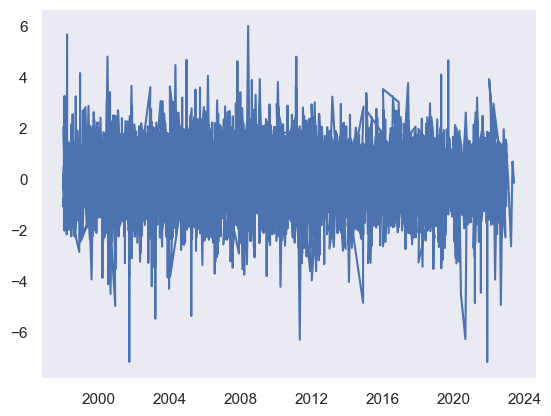

In [45]:
plt.plot(garch_models[0].std_resid)

In [46]:
# Get the conditional correlation matrix
Garch.iloc[:,0:5].corr()

,Brent Price,Cac40_Return,Dax_Return,FTSE100_Return,FTSE_MIB_Return
Brent Price,1.000000,0.394374,0.562629,0.397863,0.029611
Cac40_Return,0.394374,1.000000,0.781621,0.906390,0.782595
Dax_Return,0.562629,0.781621,1.000000,0.769548,0.432747
FTSE100_Return,0.397863,0.906390,0.769548,1.000000,0.738052
FTSE_MIB_Return,0.029611,0.782595,0.432747,0.738052,1.000000


In [47]:
# Get the conditional correlation matrix
Garch.iloc[:,6:9].corr()

,Wti_Price,Dj_Return,SP500_Return
Wti_Price,1.000000,0.600813,0.592606
Dj_Return,0.600813,1.000000,0.974683
SP500_Return,0.592606,0.974683,1.000000


In [48]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data
scaled_data = scaler.fit_transform(Garch)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=Garch.columns, index=Garch.index)

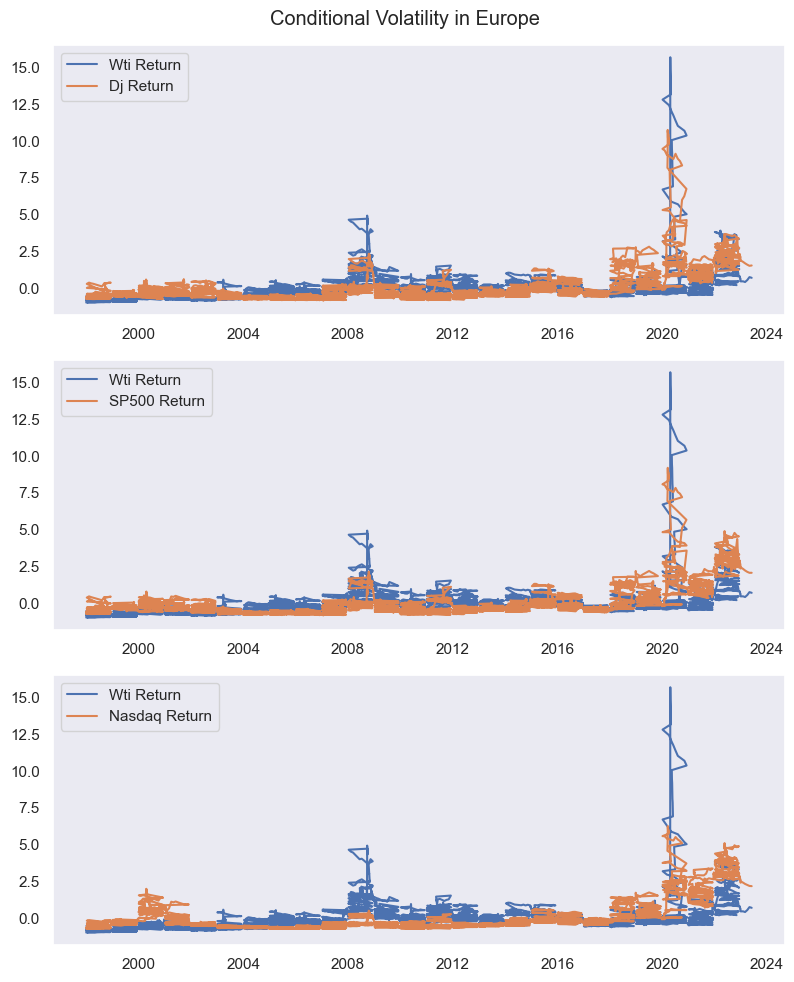

In [49]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle('Conditional Volatility in Europe')

axs[0].plot(scaled_df.iloc[:,6], label='Wti Return')
axs[0].plot(scaled_df.iloc[:,7], label='Dj Return')

axs[1].plot(scaled_df.iloc[:,6], label='Wti Return')
axs[1].plot(scaled_df.iloc[:,8], label='SP500 Return')

axs[2].plot(scaled_df.iloc[:,6], label='Wti Return')
axs[2].plot(scaled_df.iloc[:,9], label='Nasdaq Return')

# Adjust the spacing between subplots
plt.tight_layout()
axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.show()

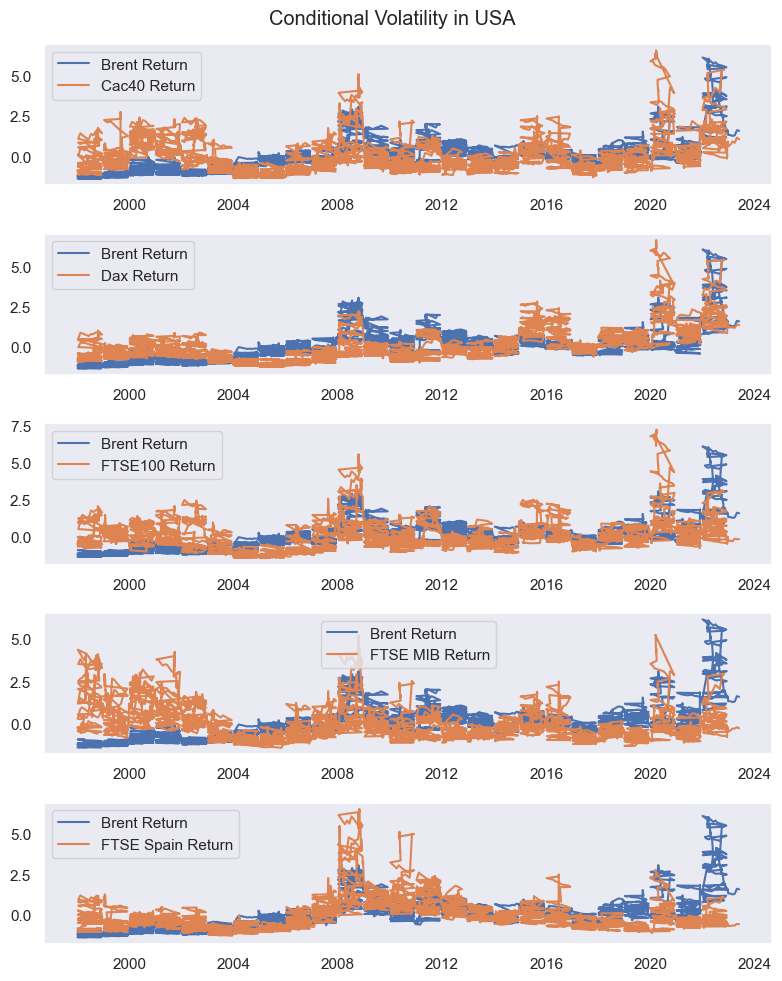

In [50]:
fig, axs = plt.subplots(5, 1, figsize=(8, 10))
fig.suptitle('Conditional Volatility in USA')

axs[0].plot(scaled_df.iloc[:,0], label='Brent Return')
axs[0].plot(scaled_df.iloc[:,1], label='Cac40 Return')

axs[1].plot(scaled_df.iloc[:,0], label='Brent Return')
axs[1].plot(scaled_df.iloc[:,2], label='Dax Return')

axs[2].plot(scaled_df.iloc[:,0], label='Brent Return')
axs[2].plot(scaled_df.iloc[:,3], label='FTSE100 Return')

axs[3].plot(scaled_df.iloc[:,0], label='Brent Return')
axs[3].plot(scaled_df.iloc[:,4], label='FTSE MIB Return')

axs[4].plot(scaled_df.iloc[:,0], label='Brent Return')
axs[4].plot(scaled_df.iloc[:,5], label='FTSE Spain Return')

# Adjust the spacing between subplots
plt.tight_layout()
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()

plt.show()

The Exponentially Weighted Moving Average (EWMA) method is a statistical technique used to estimate the volatility of financial time series data. It is commonly employed in financial analysis to analyze and forecast volatility.

EWMA assigns exponentially decreasing weights to past observations, with more weight given to recent data points and less weight given to older data points. By giving greater importance to recent observations, the EWMA method captures more recent trends and changes in volatility, providing a more responsive measure of volatility compared to other methods such as simple moving average.

The relevance of EWMA in financial analysis lies in its ability to adapt to changing market conditions and capture short-term dynamics in volatility. It is particularly useful when volatility exhibits clustering, meaning periods of high volatility are followed by subsequent periods of high volatility.

**Equations and Assumptions in the EWMA Method**
The EWMA volatility estimate for time period t can be calculated using the following equation:

$σ_t^2 = λ * σ_{t-1}^2 + (1 - λ) * R_t^2$

where:

- $σ_t^2$ is the EWMA volatility estimate at time `t`.
- $R_t$ is the log return at time `t`.
- $\lambda$ is the smoothing factor, typically between 0 and 1.
- $σ_t-1^2$ is the EWMA volatility estimate at the previous time period.

**Assumptions in the EWMA method**

- Log Returns Stationarity: The log returns of the series are assumed to be stationary or exhibit only predictable changes over time.

- Exponential Weighting: The weights assigned to the log returns are exponentially decreasing, giving more weight to recent observations and less weight to older observations.

- Constant Smoothing Factor: The chosen smoothing factor ($\lambda$) remains constant throughout the analysis and does not vary over time.

It's important to note that the choice of the smoothing factor ($\lambda$) is subjective and can significantly impact the volatility estimates. Different values of λ can lead to varying levels of responsiveness to recent data and affect the interpretation of volatility dynamics.

>Applying EWMA to Analyze the Relationship between Stock Indices and Oil Prices:

To analyze the relationship between stock indices and oil prices using the EWMA method, you can follow these steps:

Compute the log returns for each series by taking the natural logarithm of the ratio of consecutive prices. Log returns are often used in financial analysis to account for the percentage change in prices.

In [51]:
# Calculate logarithmic returns
log_returns = np.log(Data.iloc[:, 1:]) - np.log(Data.iloc[:, 1:].shift(1))

# Create a new DataFrame with Dates and log returns
log_Ts = pd.DataFrame({'Dates': Data['Dates']})
log_Ts = pd.concat([log_Ts, log_returns], axis=1).dropna()

# Assuming you have a DataFrame named log_Ts
log_Ts = log_Ts.set_index('Dates')

C:\Users\Administrator\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


Apply the EWMA method to estimate the volatility of each series based on the log returns. Assign weights to the log returns, with higher weights for recent observations and decreasing weights for older observations.

Choose an appropriate smoothing factor, typically denoted as lambda ($\lambda$), which determines the rate at which weights decay. A smaller lambda places more emphasis on recent observations, while a larger lambda places more weight on historical observations.

 Compute the EWMA volatility for each series by applying the weighted average to the squared log returns. The volatility estimates are obtained as the square root of the EWMA volatilities.

Analyze the resulting volatility estimates to identify patterns, changes, and relationships between stock indices and oil prices. Look for periods of increased or decreased volatility and compare the volatility dynamics across different series.

In [52]:
# Calculate the EWMA
ewma_data = log_Ts.iloc[:, 0:].ewm(alpha=0.2).mean()

# Get the summary statistics
summary_stats = ewma_data.describe()

#print(summary_stats)

# Calculate the standard deviation of the EWMA series
ewma_volatility = ewma_data.std()

# Calculate the variance of the EWMA series
ewma_variance = np.power(ewma_data, 2)

print("EWMA Volatility:")
print(ewma_volatility)

EWMA Volatility:
Brent_Price          0.007970
Cac40_Return         0.004063
Dax_Return           0.004331
Dj_Return            0.003268
FTSE100_Return       0.003273
FTSE_MIB_Return      0.004521
FTSE_Spain_Return    0.004832
Nasdaq_Return        0.004491
SP500_Return         0.003371
Wti_Price            0.008057
dtype: float64


In [53]:
ewma_data.head()

,Brent_Price,Cac40_Return,Dax_Return,Dj_Return,FTSE100_Return,FTSE_MIB_Return,FTSE_Spain_Return,Nasdaq_Return,SP500_Return,Wti_Price
Dates,,,,,,,,,,
1998-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1998-02-01,-0.003162,0.007586,0.018116,0.003976,0.006239,0.011546,0.013370,0.003941,0.002633,-0.007606
1998-03-01,-0.001866,0.004477,0.010691,0.002346,0.003682,0.006814,0.007890,0.002326,0.001554,-0.004489
1998-04-01,-0.001234,0.002960,0.007070,0.001552,0.002435,0.004506,0.005217,0.001538,0.001027,-0.002968
1998-05-01,-0.010062,0.005262,0.008532,0.001611,0.005637,0.012797,0.007181,0.003439,0.001341,-0.010051


In [54]:
#Correlation
ewma_data[['Wti_Price','Dj_Return','SP500_Return','Nasdaq_Return']].corr()

,Wti_Price,Dj_Return,SP500_Return,Nasdaq_Return
Wti_Price,1.000000,0.230786,0.246716,0.211001
Dj_Return,0.230786,1.000000,0.956463,0.777133
SP500_Return,0.246716,0.956463,1.000000,0.883791
Nasdaq_Return,0.211001,0.777133,0.883791,1.000000


In [55]:
#Correlation
ewma_data[['Brent_Price','Cac40_Return','Dax_Return','FTSE100_Return','FTSE_MIB_Return','FTSE_Spain_Return']].corr()

,Brent_Price,Cac40_Return,Dax_Return,FTSE100_Return,FTSE_MIB_Return,FTSE_Spain_Return
Brent_Price,1.000000,0.249536,0.220204,0.279885,0.257150,0.244660
Cac40_Return,0.249536,1.000000,0.915512,0.875994,0.884447,0.769494
Dax_Return,0.220204,0.915512,1.000000,0.825682,0.840344,0.726268
FTSE100_Return,0.279885,0.875994,0.825682,1.000000,0.785972,0.702783
FTSE_MIB_Return,0.257150,0.884447,0.840344,0.785972,1.000000,0.794927
FTSE_Spain_Return,0.244660,0.769494,0.726268,0.702783,0.794927,1.000000


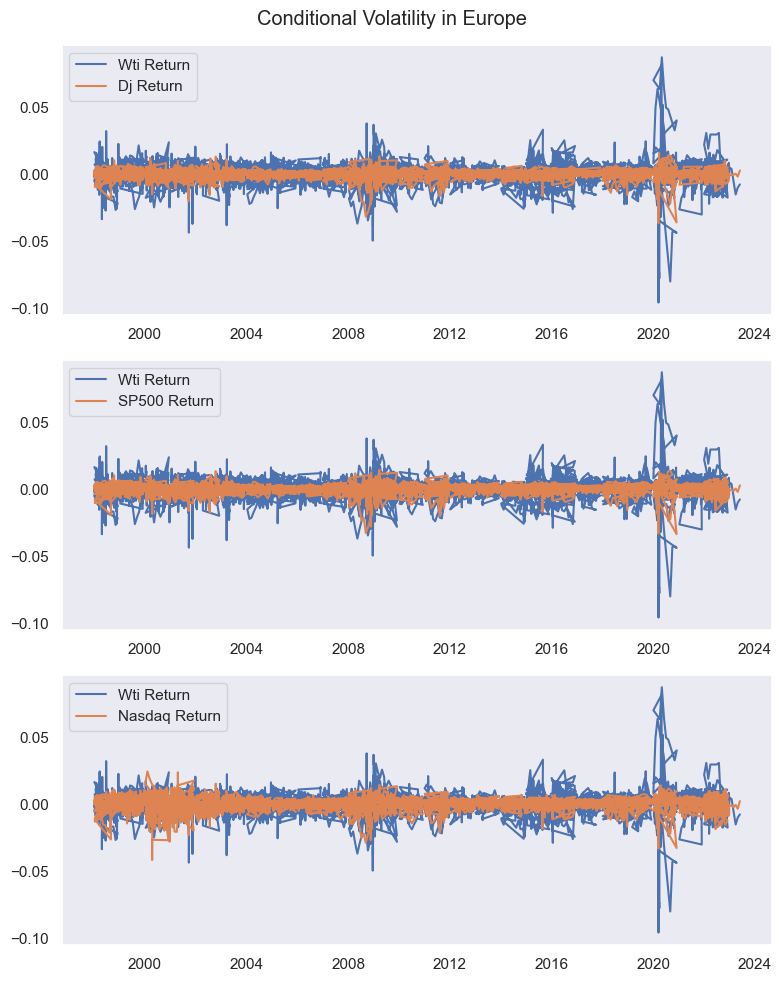

In [56]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))
fig.suptitle('Conditional Volatility in Europe')

axs[0].plot(ewma_data.iloc[:,9], label='Wti Return')
axs[0].plot(ewma_data.iloc[:,3], label='Dj Return')

axs[1].plot(ewma_data.iloc[:,9], label='Wti Return')
axs[1].plot(ewma_data.iloc[:,8], label='SP500 Return')

axs[2].plot(ewma_data.iloc[:,9], label='Wti Return')
axs[2].plot(ewma_data.iloc[:,7], label='Nasdaq Return')

# Adjust the spacing between subplots
plt.tight_layout()
axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.show()

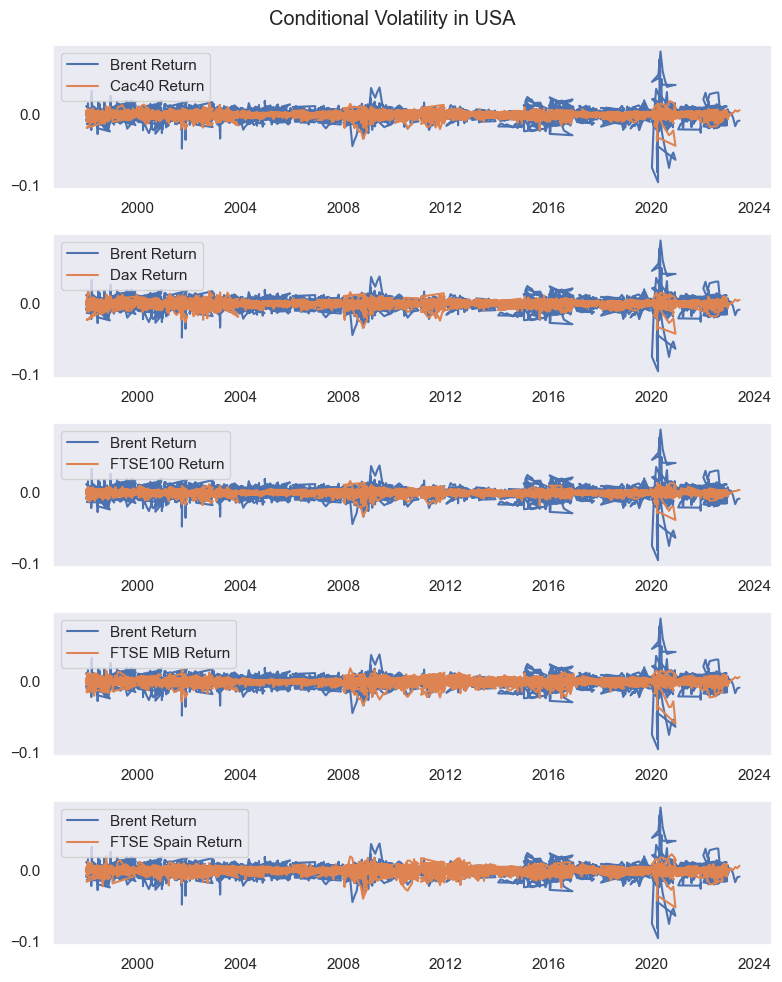

In [57]:
fig, axs = plt.subplots(5, 1, figsize=(8, 10))
fig.suptitle('Conditional Volatility in USA')

axs[0].plot(ewma_data.iloc[:,0], label='Brent Return')
axs[0].plot(ewma_data.iloc[:,1], label='Cac40 Return')

axs[1].plot(ewma_data.iloc[:,0], label='Brent Return')
axs[1].plot(ewma_data.iloc[:,2], label='Dax Return')

axs[2].plot(ewma_data.iloc[:,0], label='Brent Return')
axs[2].plot(ewma_data.iloc[:,4], label='FTSE100 Return')

axs[3].plot(ewma_data.iloc[:,0], label='Brent Return')
axs[3].plot(ewma_data.iloc[:,5], label='FTSE MIB Return')

axs[4].plot(ewma_data.iloc[:,0], label='Brent Return')
axs[4].plot(ewma_data.iloc[:,6], label='FTSE Spain Return')

# Adjust the spacing between subplots
plt.tight_layout()
axs[0].legend()
axs[1].legend()
axs[2].legend()
axs[3].legend()
axs[4].legend()

plt.show()

The Autoregressive Distributed Lag (ARDL) model is a econometric modeling framework used to analyze the long-term relationship between variables in time series data. It allows for the investigation of both short-term dynamics and long-term equilibrium relationships between variables.

ARDL is particularly useful when examining the relationship between variables that may exhibit a combination of stationary and non-stationary properties. It can capture both short-term adjustments and the long-run equilibrium between the variables.

**Equations and Assumptions in the ARDL Model**
The ARDL model can be represented by the following equation:

$yt = β0 + β1X1_t + β2X2_t + ... + βnXn_t + φ1y_t-1 + φ2y_t-2 + ... + φpy_t-p + ε_t$

where:

$y_t$ represents the dependent variable (e.g., stock index).
$X1_t, X2_t, ..., Xn_t$ represent the independent variables (e.g., oil prices).
$φ1, φ2, ..., φp$ represent the coefficients of the lagged dependent variable $(y_{t-1}, y_{t-2}, ..., y_{t-p})$.
$β0, β1, β2, ..., βn$ represent the coefficients of the independent variables.
$εt$ is the error term.

**Assumptions in the ARDL model**

- Stationarity: The variables in the model are assumed to be stationary or transformed to achieve stationarity.

- No Perfect Collinearity: The independent variables should not exhibit perfect collinearity to avoid numerical instability.

- No Autocorrelation: The error term should not exhibit serial correlation to ensure the efficiency of the parameter estimates.

- No Endogeneity: The independent variables should be exogenous and not influenced by the error term.

>Application of ARDL in Analyzing the Relationship between Stock Indices and Oil Prices:

To analyze the relationship between stock indices and oil prices using the ARDL model.

Stationarity Analysis: Conduct unit root tests (such as the Augmented Dickey-Fuller or Phillips-Perron tests) to assess the stationarity properties of the variables. Determine if the variables are stationary in levels or if they require differencing to achieve stationarity.

Model Specification: Specify the appropriate ARDL model based on the stationarity properties of the variables. The ARDL model includes lagged values of both stock indices and oil prices to capture the short-term dynamics and potential long-term equilibrium relationship.

Estimation and Inference: Estimate the parameters of the ARDL model using suitable estimation techniques like ordinary least squares (OLS). Conduct hypothesis tests on the coefficients to assess the significance of the relationships between the variables.


In [58]:
# Filter by a specific date range
start_date = '2008-01-01'
end_date = '2010-01-01'
Global_crisis = Return[(Return.index >= start_date) & (Return.index <= end_date)]

In [59]:
# Filter by a specific date range
start_date = '2020-01-01'
end_date = '2022-01-01'
Covid_crisis = Return[(Return.index >= start_date) & (Return.index <= end_date)]

In [60]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ardl import ARDL

In [61]:
# Create a DataFrame with the independent variables
independent_vars = Global_crisis[['Dj_Return', 'Nasdaq_Return',
                           'SP500_Return']]

# Define the dependent variable
dependent_var = Global_crisis['Wti_Price']

# Combine the dependent and independent variables into a single DataFrame
data = pd.concat([dependent_var, independent_vars], axis=1)

# Fit the ARDL model
model = ARDL(data.Wti_Price, 1, independent_vars, 1)
results = model.fit()

# Print the model summary
print(results.summary())

# Create a DataFrame with the independent variables
independent_vars = Global_crisis[['Cac40_Return', 'Dax_Return', 'FTSE_MIB_Return',
                           'FTSE_Spain_Return', 'FTSE100_Return', 'Wti_Price']]

# Define the dependent variable
dependent_var = Global_crisis['Brent_Price']

# Combine the dependent and independent variables into a single DataFrame
data = pd.concat([dependent_var, independent_vars], axis=1)

# Fit the ARDL model
model = ARDL(data.Brent_Price, 1, independent_vars, 1)
results = model.fit()

# Print the model summary
print(results.summary())

                              ARDL Model Results                              
Dep. Variable:              Wti_Price   No. Observations:                  732
Model:               ARDL(1, 1, 1, 1)   Log Likelihood               -1561.390
Method:               Conditional MLE   S.D. of innovations              2.048
Date:                Thu, 13 Jul 2023   AIC                           3140.780
Time:                        23:13:56   BIC                           3182.130
Sample:                             1   HQIC                          3156.732
                                  732                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0192      0.076      0.251      0.802      -0.131       0.169
Wti_Price.L1        -0.1212      0.037     -3.300      0.001      -0.193      -0.049
Dj_Return.L0        -0.0161 

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [62]:
# Create a DataFrame with the independent variables
independent_vars = Covid_crisis[['Dj_Return', 'Nasdaq_Return',
                           'SP500_Return']]

# Define the dependent variable
dependent_var = Covid_crisis['Wti_Price']

# Combine the dependent and independent variables into a single DataFrame
data = pd.concat([dependent_var, independent_vars], axis=1)

# Fit the ARDL model
model = ARDL(data.Wti_Price, 1, independent_vars, 1)
results = model.fit()

# Print the model summary
print(results.summary())


# Create a DataFrame with the independent variables
independent_vars = Covid_crisis[['Cac40_Return', 'Dax_Return', 'FTSE_MIB_Return',
                           'FTSE_Spain_Return', 'FTSE100_Return']]

# Define the dependent variable
dependent_var = Covid_crisis['Brent_Price']

# Combine the dependent and independent variables into a single DataFrame
data = pd.concat([dependent_var, independent_vars], axis=1)

# Fit the ARDL model
model = ARDL(data.Brent_Price, 1, independent_vars, 1)
results = model.fit()

# Print the model summary
print(results.summary())

                              ARDL Model Results                              
Dep. Variable:              Wti_Price   No. Observations:                  521
Model:               ARDL(1, 1, 1, 1)   Log Likelihood               -1345.599
Method:               Conditional MLE   S.D. of innovations              3.218
Date:                Thu, 13 Jul 2023   AIC                           2709.198
Time:                        23:14:03   BIC                           2747.483
Sample:                             1   HQIC                          2724.196
                                  521                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0459      0.144      0.319      0.750      -0.237       0.329
Wti_Price.L1        -0.3572      0.041     -8.620      0.000      -0.439      -0.276
Dj_Return.L0         0.0042 

C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Administrator\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


# Conclusion
In this analysis, we investigated the relationship between stock indices and oil prices using various methods, including the EWMA (Exponentially Weighted Moving Average) method, the ARDL (Autoregressive Distributed Lag) model and GARCH (Generalized Autoregressive Conditional Heteroskedasticity).

The EWMA method was applied to estimate the volatility of each series based on the log returns.We assigned weights to the log returns, with higher weights for recent observations and decreasing weights for older observations.This allowed us to capture the changing volatility patterns over time and assess the risk associated with each series.

The ARDL model was employed to analyze the relationship between stock indices and oil prices.The model was estimated, and the coefficients, p-values, and diagnostic statistics were analyzed.

the GARCH model was employed and to analyze the relationship between stock indices and oil prices. the correlation coefficients were extracted and plotted to evaluate the association over time.

The results from the ARDL model provided insights into the relationship between stock indices and oil prices.The coefficient estimates and their significance indicated the direction and strength of the relationship.
It was found that changes in oil prices had a only a slight impact on stock indices but was not significant, suggesting a no relationship between the two variables.Further analysis of the coefficients and their signs provided a deeper understanding of the specific dynamics between stock indices and oil prices.
